<a href="https://colab.research.google.com/github/Archanatshinod/DATASCIENCE_PROJECTS/blob/main/Credit_card_Fraud_detection_using_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score

In [5]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25833,33785,-0.187402,0.445507,2.199225,3.030535,-0.361376,1.095100,-0.119594,0.245950,-0.371890,...,0.154001,0.813468,0.377732,0.201209,-1.671394,-0.064077,0.067891,0.021521,42.33,0.0
25834,33785,1.237064,0.312096,0.191934,0.496764,-0.129777,-0.551625,-0.007160,-0.048880,-0.240393,...,-0.255114,-0.759423,0.072774,-0.035961,0.238605,0.096858,-0.025772,0.017772,1.79,0.0
25835,33785,1.245292,-0.594493,0.275982,-0.578346,-0.920599,-0.865570,-0.321689,-0.217249,-1.007295,...,0.303333,0.736260,-0.102900,0.452253,0.510125,-0.114928,0.003129,0.021850,70.75,0.0
25836,33787,-0.697373,0.401180,0.803750,-1.015524,-0.226100,0.283660,0.094868,0.077613,-1.327124,...,0.118688,0.467655,-0.162958,-0.703390,-0.174347,-0.202938,-0.369636,-0.152421,49.95,0.0


In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25837 entries, 0 to 25836
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    25837 non-null  int64  
 1   V1      25837 non-null  float64
 2   V2      25837 non-null  float64
 3   V3      25837 non-null  float64
 4   V4      25837 non-null  float64
 5   V5      25837 non-null  float64
 6   V6      25837 non-null  float64
 7   V7      25837 non-null  float64
 8   V8      25837 non-null  float64
 9   V9      25837 non-null  float64
 10  V10     25837 non-null  float64
 11  V11     25837 non-null  float64
 12  V12     25837 non-null  float64
 13  V13     25837 non-null  float64
 14  V14     25837 non-null  float64
 15  V15     25837 non-null  float64
 16  V16     25837 non-null  float64
 17  V17     25837 non-null  float64
 18  V18     25837 non-null  float64
 19  V19     25837 non-null  float64
 20  V20     25837 non-null  float64
 21  V21     25837 non-null  float64
 22  V22

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,...,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000
mean,19375.570771,-0.225712,0.166964,0.723131,0.229368,-0.194354,0.079800,-0.128669,0.026060,0.441922,...,-0.037598,-0.132262,-0.039778,0.011174,0.129413,0.023418,0.013306,0.004153,75.808937,0.003406
std,11653.780077,1.889067,1.552825,1.684909,1.434242,1.436206,1.323018,1.319114,1.341622,1.269785,...,0.817316,0.641426,0.538789,0.590048,0.436213,0.516670,0.397674,0.280120,219.661154,0.058262
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,7694.000000,-0.951371,-0.405182,0.279675,-0.683788,-0.779682,-0.662365,-0.594982,-0.164442,-0.384700,...,-0.249309,-0.552080,-0.173949,-0.325263,-0.133337,-0.338941,-0.065269,-0.008898,6.060000,0.000000
50%,22682.000000,-0.268134,0.176391,0.862364,0.204882,-0.224921,-0.179636,-0.067756,0.029393,0.358908,...,-0.097962,-0.106938,-0.049040,0.063000,0.167170,-0.052787,0.007047,0.019985,18.960000,0.000000
75%,30230.000000,1.166445,0.818213,1.489349,1.109950,0.320600,0.466671,0.446339,0.287518,1.200785,...,0.072314,0.276513,0.075082,0.399042,0.410283,0.306226,0.091845,0.076753,67.610000,0.000000
max,33787.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [10]:
data.shape

(25837, 31)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.336029,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.332878,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.378746,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.217116,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.026491,0.0


In [13]:
data.Amount.value_counts()

Amount
-0.340572    1135
-0.291177     593
-0.341073     427
-0.336110     407
-0.299644     389
             ... 
 2.574292       1
 0.510210       1
-0.124234       1
 3.961820       1
-0.187743       1
Name: count, Length: 7584, dtype: int64

In [14]:
data['Class'].value_counts()

Class
0.0    25749
1.0       88
Name: count, dtype: int64

<ipython-input-16-3ec9061b871a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val,ax=ax[0],color='r')
<ipython-input-16-3ec9061b871a>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val,ax=ax[1],color='b')


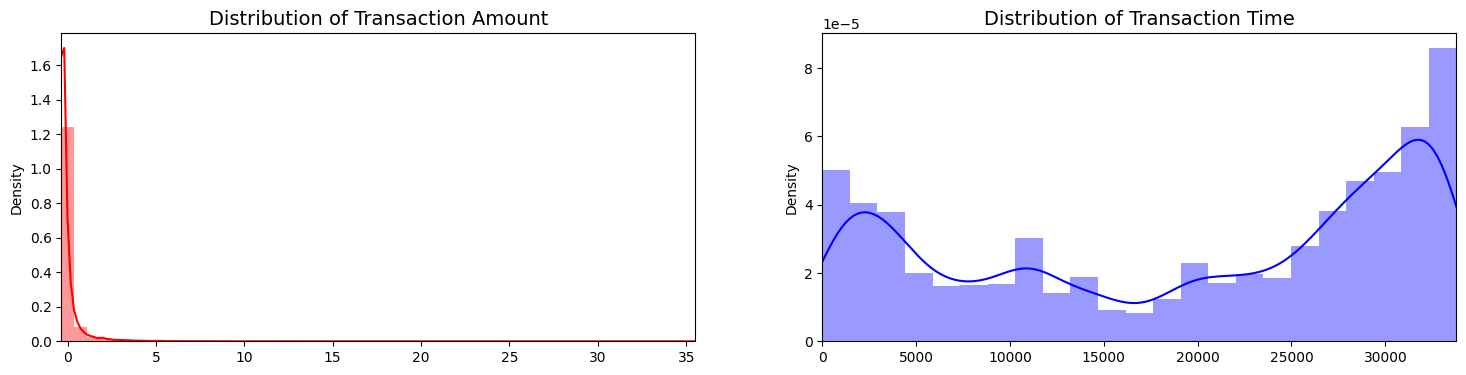

In [16]:
fig,ax=plt.subplots(1,2,figsize=(18,4))

amount_val=data['Amount'].values
time_val=data['Time'].values

sns.distplot(amount_val,ax=ax[0],color='r')
ax[0].set_title('Distribution of Transaction Amount',fontsize=14)
ax[0].set_xlim([min(amount_val),max(amount_val)])

sns.distplot(time_val,ax=ax[1],color='b')
ax[1].set_title('Distribution of Transaction Time',fontsize=14)
ax[1].set_xlim([min(time_val),max(time_val)])
plt.show()

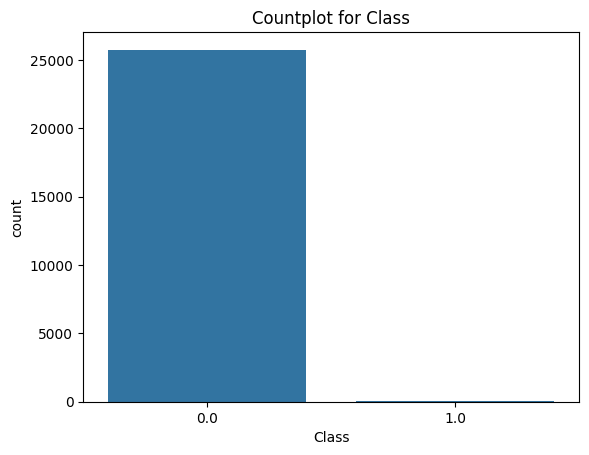

In [17]:
sns.countplot(data,x="Class")
plt.title("Countplot for Class")
plt.show()

In [18]:
x=data.drop('Class',axis=1)
y=data['Class']
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.336029,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.332878,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.378746,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.217116,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.026491,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25832,33784,1.261980,-0.325252,-0.143104,-1.105445,-0.156888,0.006692,-0.258470,0.171292,1.351646,...,-0.184571,-0.361529,-0.094535,-0.843711,0.618429,-0.742185,0.061109,-0.001626,-0.340572,0.0
25833,33785,-0.187402,0.445507,2.199225,3.030535,-0.361376,1.095100,-0.119594,0.245950,-0.371890,...,0.154001,0.813468,0.377732,0.201209,-1.671394,-0.064077,0.067891,0.021521,-0.152415,0.0
25834,33785,1.237064,0.312096,0.191934,0.496764,-0.129777,-0.551625,-0.007160,-0.048880,-0.240393,...,-0.255114,-0.759423,0.072774,-0.035961,0.238605,0.096858,-0.025772,0.017772,-0.336975,0.0
25835,33785,1.245292,-0.594493,0.275982,-0.578346,-0.920599,-0.865570,-0.321689,-0.217249,-1.007295,...,0.303333,0.736260,-0.102900,0.452253,0.510125,-0.114928,0.003129,0.021850,-0.023031,0.0


In [19]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20669, 30), (5168, 30), (20669,), (5168,))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

model=LogisticRegression()
hist1=model.fit(X_train,y_train)

predictions=model.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print("Accuracy:",accuracy)



Accuracy: 0.9969040247678018


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
conf_matrix=confusion_matrix(y_test,predictions)
print("Confusion matrix:\n",conf_matrix)

Confusion matrix:
 [[5144    5]
 [  11    8]]


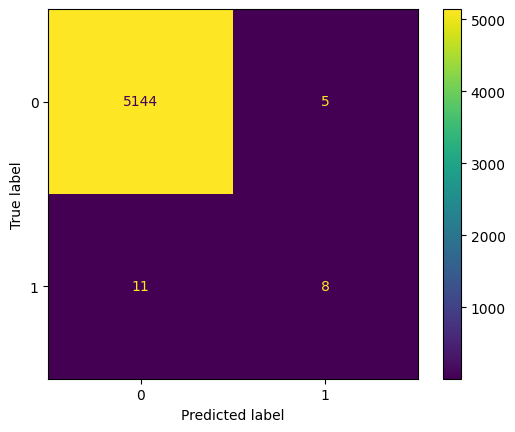

In [26]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [29]:
from sklearn.metrics import classification_report
report=classification_report(y_test,predictions)
print('Classification Report:\n',report)

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5149
         1.0       0.62      0.42      0.50        19

    accuracy                           1.00      5168
   macro avg       0.81      0.71      0.75      5168
weighted avg       1.00      1.00      1.00      5168



RANDOM FOREST

In [30]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report


In [31]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

predictions=model.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print("Test Accuracy:",accuracy)

Test Accuracy: 0.9992260061919505


In [32]:
report=classification_report(y_test,predictions)
print('Classification Report:\n',report)

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5149
         1.0       0.94      0.84      0.89        19

    accuracy                           1.00      5168
   macro avg       0.97      0.92      0.94      5168
weighted avg       1.00      1.00      1.00      5168

